In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

from sklearn.model_selection import train_test_split


In [2]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


# pickle_in = open("/content/drive/MyDrive/Pickle Files for Deep learning/X.pickle","rb")
# X = pickle.load(pickle_in)


# pickle_in = open("/content/drive/MyDrive/Pickle Files for Deep learning/y.pickle","rb")
# y = pickle.load(pickle_in)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.1, random_state=None)

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))



In [11]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)         

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) #20 for the 20 bird species

In [13]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)         

In [14]:
y_train = np.array(y_train)
y_test = np.array(y_test)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
439/439 [==============================] - 4s 8ms/step - loss: 1.6815 - accuracy: 0.5143 - val_loss: 0.4597 - val_accuracy: 0.8750
Epoch 2/50
439/439 [==============================] - 4s 8ms/step - loss: 0.4973 - accuracy: 0.8395 - val_loss: 0.2180 - val_accuracy: 0.9404
Epoch 3/50
439/439 [==============================] - 4s 8ms/step - loss: 0.2718 - accuracy: 0.9156 - val_loss: 0.1170 - val_accuracy: 0.9667
Epoch 4/50
439/439 [==============================] - 4s 8ms/step - loss: 0.2090 - accuracy: 0.9360 - val_loss: 0.0806 - val_accuracy: 0.9769
Epoch 5/50
439/439 [==============================] - 4s 8ms/step - loss: 0.1570 - accuracy: 0.9526 - val_loss: 0.0846 - val_accuracy: 0.9686
Epoch 6/50
439/439 [==============================] - 4s 8ms/step - loss: 0.1426 - accuracy: 0.9558 - val_loss: 0.0395 - val_accuracy: 0.9897
Epoch 7/50
439/439 [==============================] - 4s 8ms/step - loss: 0.1141 - accuracy: 0.9655 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

49/49 - 0s - loss: 0.0197 - accuracy: 0.9949 - 143ms/epoch - 3ms/step
0.9948717951774597


49/49 - 0s - loss: 0.0197 - accuracy: 0.9949 - 145ms/epoch - 3ms/step


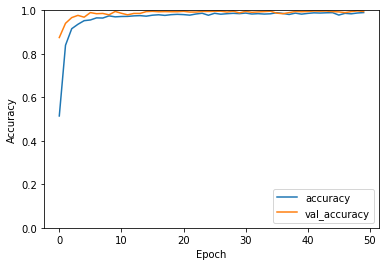

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [17]:

model.save('saved_model/my_model')



INFO:tensorflow:Assets written to: saved_model/my_model\assets
